# Library

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import re # regular expressions
import string

# Methods

In [2]:
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(file.read().splitlines())
    return stop_words

# Main

## Dataset

In [4]:
dataset = pd.read_json("..\dataset\Turkish_data_depository_630koseyazisi.jsonl",lines=True)
print(dataset.head(10))
print(dataset.info())

  writer  file_id                                             column
0    ttu       27  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
1    ttu       28  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
2    ttu        3  Cumhuriyetin en kritik yerel seçimi \r\nMURAT ...
3    ttu        4  Çekilin artık kamera karşısından \r\nHER kar y...
4    ttu       23  Lorant'ın heyecan veren hedefi  \r\n     \r\n\...
5    ttu       14  Gerçekten de gülüp geçilecek bir öneri \r\nGAZ...
6    ttu       13  Mercedes çeşitlemeleri \r\nTÜRK insanı, Merced...
7    ttu       31  Yazarın çilesi  \r\n     \r\n\r\n  \r\nZAMAN z...
8    ttu       19  Tüm yazı konularını silip süpüren fotoğraf \r\...
9    ttu       11  Şarkta böyledir bu işler...  \r\n     \r\nttu...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   writer   630 non-null    object
 1   file_id  630 non-null

In [5]:
x = dataset.iloc[:, 2].values.astype("str") # author text
y = dataset.iloc[:, 0].values.astype("str") # author name

print(f"type x : {type(x)} , type y : {type(y)}")

type x : <class 'numpy.ndarray'> , type y : <class 'numpy.ndarray'>


## Preprocesing

In [7]:
# turkish stop words
stop_words = load_stop_words("..\stopwordsTR\stopwords.txt")

# Her bir metni temizleme işlemi
for i in range(len(x)):
    # Convert to lowercase - Küçük harfe çevirme
    x[i] = x[i].lower()
    
    # Remove escape characters - Kaçış karakterlerini kaldırma
    x[i] = re.sub(r'[\r\n]', ' ', x[i]) 
    
    # Remove unnecessary characters - Gereksiz karakterleri kaldırma
    x[i] = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ\s]', '', x[i])
    
    # Remove stop words - Stop kelimeleri kaldırma
    x[i] = ' '.join([word for word in x[i].split() if word not in stop_words])
    
    # Remove punctuation marks - Noktalama işaretlerini kaldırma
    x[i] = x[i].translate(str.maketrans('', '', string.punctuation))
    
    # Remove repeating spaces - Tekrar eden boşlukları kaldırma
    x[i] = re.sub(r'\s+', ' ', x[i])
    

# Convert to feature vector

## TF-IDF (Term Frequency-Inverse Document Frequency):
It is a statistical method used to measure the importance of words in text documents. TF-IDF vectors combine each word's frequency (TF) in the text and its rarity (IDF) across all documents.

Metin belgelerindeki kelimelerin önemini ölçmek için kullanılan bir istatistiksel yöntemdir. TF-IDF vektörleri, her kelimenin metindeki sıklığını (TF) ve tüm belgelerdeki nadirliğini (IDF) birleştirir.

In [8]:
# Create TF-IDF vector - TF-IDF vektörlerini oluşturma
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(x)

example_tfidf_vector = tfidf_matrix[0]
print("TF-IDF Vektörü (Örnek):", example_tfidf_vector)

TF-IDF Vektörü (Örnek):   (0, 17080)	0.06186254539557715
  (0, 32471)	0.0511575158034168
  (0, 25685)	0.05905933162262373
  (0, 19075)	0.040820233169889156
  (0, 43838)	0.03662262504905008
  (0, 37247)	0.06186254539557715
  (0, 3382)	0.06186254539557715
  (0, 35092)	0.023175473657450724
  (0, 12735)	0.03484605866534959
  (0, 8736)	0.06186254539557715
  (0, 27050)	0.0382062319024461
  (0, 41766)	0.052305209940066835
  (0, 51106)	0.03569390951786267
  (0, 46512)	0.02986850336649319
  (0, 12742)	0.04244803120041957
  (0, 36102)	0.05360635823803543
  (0, 11953)	0.03464514148833336
  (0, 14406)	0.06186254539557715
  (0, 52468)	0.04835430203046337
  (0, 46233)	0.026854434488219992
  (0, 53903)	0.05905933162262373
  (0, 10955)	0.03406611148733226
  (0, 5673)	0.041600180347906475
  (0, 18990)	0.05360635823803543
  (0, 17025)	0.0511575158034168
  :	:
  (0, 17336)	0.0511575158034168
  (0, 17175)	0.05360635823803543
  (0, 23969)	0.03898763033485278
  (0, 2576)	0.052305209940066835
  (0, 8070)	0.0

## Word Embeddings (Kelime Gömme):
It represents words with numerical vectors using word embedding models with techniques such as Word2Vec, GloVe, FastText. These vectors better reflect the meaning of the word.

Word2Vec, GloVe, FastText gibi tekniklerle kelime gömme modelleri kullanarak kelimeleri sayısal vektörlerle temsil eder. Bu vektörler, kelimenin anlamını daha iyi yansıtır.

In [9]:
# Create BoW vector - BoW vektörlerini oluşturma
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(x)

example_bow_vector = bow_matrix[0]
print("BoW Vektörü (Örnek):", example_bow_vector)

BoW Vektörü (Örnek):   (0, 51208)	4
  (0, 55662)	4
  (0, 48259)	2
  (0, 32423)	2
  (0, 19750)	2
  (0, 29476)	2
  (0, 17058)	1
  (0, 39134)	1
  (0, 34981)	2
  (0, 44812)	2
  (0, 30118)	1
  (0, 40807)	1
  (0, 40670)	1
  (0, 23596)	1
  (0, 3468)	6
  (0, 6934)	1
  (0, 1355)	1
  (0, 45293)	3
  (0, 23184)	2
  (0, 13978)	1
  (0, 8070)	1
  (0, 2576)	1
  (0, 23969)	2
  (0, 17175)	1
  (0, 17336)	1
  :	:
  (0, 17025)	1
  (0, 18990)	1
  (0, 5673)	1
  (0, 10955)	1
  (0, 53903)	1
  (0, 46233)	1
  (0, 52468)	1
  (0, 14406)	1
  (0, 11953)	1
  (0, 36102)	1
  (0, 12742)	1
  (0, 46512)	1
  (0, 51106)	1
  (0, 41766)	1
  (0, 27050)	1
  (0, 8736)	1
  (0, 12735)	1
  (0, 35092)	1
  (0, 3382)	1
  (0, 37247)	1
  (0, 43838)	1
  (0, 19075)	1
  (0, 25685)	1
  (0, 32471)	1
  (0, 17080)	1


## N-gram Approach(N-gram Yaklaşımı):
It creates feature vectors by taking into account consecutive word groups of the text.

Metnin ardışık kelime gruplarını dikkate alarak özellik vektörleri oluşturur. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Create Trigram BoW vector - Trigram BoW vektörlerini oluşturma
trigram_vectorizer = CountVectorizer(ngram_range=(3,3))
trigram_matrix = trigram_vectorizer.fit_transform(x)

example_trigram_vector = trigram_matrix[0]
print("Trigram BoW Vektörü (Örnek):", example_trigram_vector)

Trigram BoW Vektörü (Örnek):   (0, 179489)	1
  (0, 194628)	1
  (0, 168124)	1
  (0, 115143)	2
  (0, 72365)	1
  (0, 105702)	1
  (0, 61798)	1
  (0, 137842)	1
  (0, 124820)	1
  (0, 157310)	1
  (0, 107556)	1
  (0, 144391)	1
  (0, 143813)	1
  (0, 87476)	1
  (0, 12449)	1
  (0, 25233)	1
  (0, 5311)	1
  (0, 159190)	1
  (0, 85805)	1
  (0, 49387)	1
  (0, 29318)	1
  (0, 9567)	1
  (0, 89477)	1
  (0, 62610)	1
  (0, 179208)	1
  :	:
  (0, 161716)	1
  (0, 182870)	1
  (0, 50959)	1
  (0, 42566)	1
  (0, 128996)	1
  (0, 45102)	1
  (0, 162457)	1
  (0, 178759)	1
  (0, 147371)	1
  (0, 98890)	1
  (0, 31774)	1
  (0, 133107)	1
  (0, 49388)	1
  (0, 45057)	1
  (0, 125503)	1
  (0, 12265)	1
  (0, 85782)	1
  (0, 132135)	1
  (0, 55927)	1
  (0, 154205)	1
  (0, 69894)	1
  (0, 194621)	1
  (0, 95339)	1
  (0, 115410)	1
  (0, 140401)	1


# Machine Learning Models 

## BoW (Bag of Words) Vektörleri ile Karar Ağacı (Decision Tree) Modeli:

Karar Ağacı Modeli Doğruluğu: 0.42857142857142855


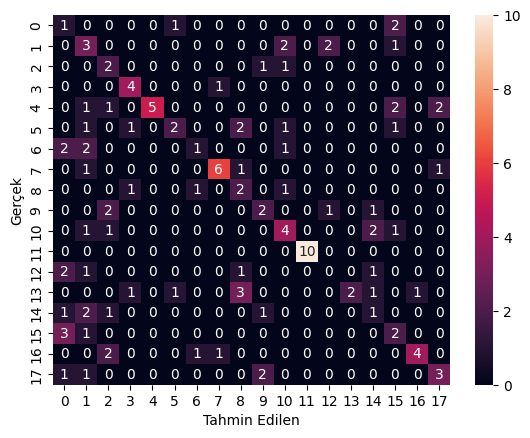

              precision    recall  f1-score   support

         aar       0.10      0.25      0.14         4
         bco       0.21      0.38      0.27         8
         cul       0.22      0.50      0.31         4
         cun       0.57      0.80      0.67         5
         ebr       1.00      0.45      0.62        11
         gur       0.50      0.25      0.33         8
         hin       0.33      0.17      0.22         6
         kaz       0.75      0.67      0.71         9
         lev       0.22      0.40      0.29         5
         msa       0.33      0.33      0.33         6
         oek       0.40      0.44      0.42         9
         psu       1.00      1.00      1.00        10
         sav       0.00      0.00      0.00         5
         tal       1.00      0.22      0.36         9
         ttu       0.17      0.17      0.17         6
         tug       0.22      0.33      0.27         6
         ved       0.80      0.50      0.62         8
         yba       0.50    

In [11]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

# Karar Ağacı modelini oluşturma ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Karar Ağacı Modeli Doğruluğu:", accuracy)

# Karar Ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)



## TF-IDF Vektörleri ile Destek Vektör Makinesi (Support Vector Machine - SVM) Modeli:

SVM Modeli Doğruluğu: 0.753968253968254


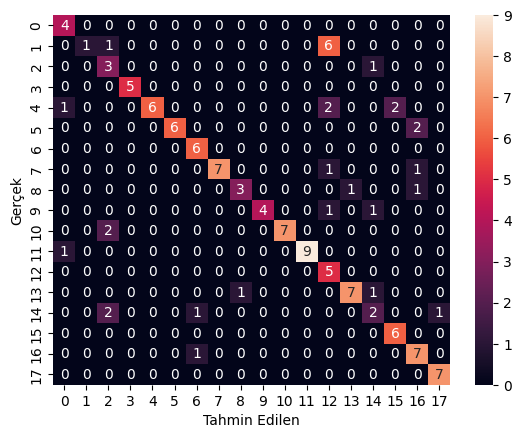

              precision    recall  f1-score   support

         aar       0.67      1.00      0.80         4
         bco       1.00      0.12      0.22         8
         cul       0.38      0.75      0.50         4
         cun       1.00      1.00      1.00         5
         ebr       1.00      0.55      0.71        11
         gur       1.00      0.75      0.86         8
         hin       0.75      1.00      0.86         6
         kaz       1.00      0.78      0.88         9
         lev       0.75      0.60      0.67         5
         msa       1.00      0.67      0.80         6
         oek       1.00      0.78      0.88         9
         psu       1.00      0.90      0.95        10
         sav       0.33      1.00      0.50         5
         tal       0.88      0.78      0.82         9
         ttu       0.40      0.33      0.36         6
         tug       0.75      1.00      0.86         6
         ved       0.64      0.88      0.74         8
         yba       0.88    

In [12]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)


## N-gram BoW Vektörleri ile Naive Bayes Modeli:

Naive Bayes Modeli Doğruluğu: 0.14285714285714285


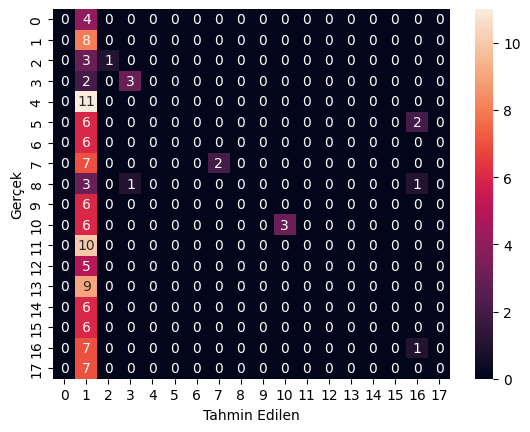

              precision    recall  f1-score   support

         aar       0.00      0.00      0.00         4
         bco       0.07      1.00      0.13         8
         cul       1.00      0.25      0.40         4
         cun       0.75      0.60      0.67         5
         ebr       0.00      0.00      0.00        11
         gur       0.00      0.00      0.00         8
         hin       0.00      0.00      0.00         6
         kaz       1.00      0.22      0.36         9
         lev       0.00      0.00      0.00         5
         msa       0.00      0.00      0.00         6
         oek       1.00      0.33      0.50         9
         psu       0.00      0.00      0.00        10
         sav       0.00      0.00      0.00         5
         tal       0.00      0.00      0.00         9
         ttu       0.00      0.00      0.00         6
         tug       0.00      0.00      0.00         6
         ved       0.25      0.12      0.17         8
         yba       0.00    

c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:

# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(trigram_matrix, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = naive_bayes.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Modeli Doğruluğu:", accuracy)

# naive bayes modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)


## Random Forest:

Random Forest Modeli Doğruluğu: 0.6190476190476191


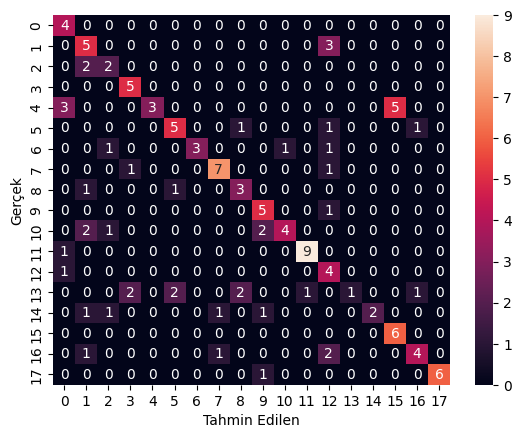

              precision    recall  f1-score   support

         aar       0.44      1.00      0.62         4
         bco       0.42      0.62      0.50         8
         cul       0.40      0.50      0.44         4
         cun       0.62      1.00      0.77         5
         ebr       1.00      0.27      0.43        11
         gur       0.62      0.62      0.62         8
         hin       1.00      0.50      0.67         6
         kaz       0.78      0.78      0.78         9
         lev       0.50      0.60      0.55         5
         msa       0.56      0.83      0.67         6
         oek       0.80      0.44      0.57         9
         psu       0.90      0.90      0.90        10
         sav       0.31      0.80      0.44         5
         tal       1.00      0.11      0.20         9
         ttu       1.00      0.33      0.50         6
         tug       0.55      1.00      0.71         6
         ved       0.67      0.50      0.57         8
         yba       1.00    

In [14]:
x_train, x_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

rnd_forest = RandomForestClassifier()
rnd_forest.fit(x_train, y_train)

y_pred = rnd_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Modeli Doğruluğu:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

classification_report = classification_report(y_test, y_pred)
print(classification_report)


## K-Nearest Neighbors (KNN):

KNN Modeli Doğruluğu: 0.0873015873015873


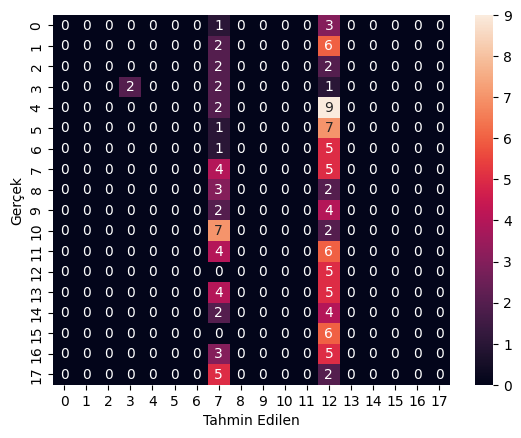

In [15]:
x_train, x_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Modeli Doğruluğu:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


## Gradient Boosting:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Modeli Doğruluğu:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


KeyboardInterrupt: 